<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMSE, qualityMedianAE
# from utils import ExponentialSmoothing
from datetime import timedelta , datetime
import math
import matplotlib.pyplot as plt
%matplotlib inline
# Put your code below
# ts.plot(figsize=(15,3))

In [2]:
ts = {}

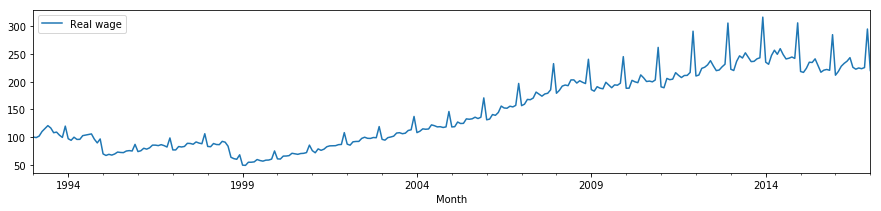

In [4]:
ts['monthly_wage'] = pd.read_csv('./data/monthly_wage.csv', sep=';',  decimal='.',dayfirst=True, index_col='Month', parse_dates=True)
ts['monthly_wage'].plot(figsize=(15,3))

There is trend and seasonality (multiplicative), period is a year

In [5]:
ts['TS_dep6'] = pd.read_csv('./data/TS_dep6.csv', sep=';',  decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts['TS_dep6'].iloc[:10]

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,0.0,3.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,9.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,0.0,3.0,1.0,2.0,1.0,0.0,2.0,6.0,3.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-08,0.0,2.0,3.0,1.0,1.0,NaN,12.0,4.0,2.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-09,1.0,1.0,1.0,9.0,5.0,0.0,0.0,2.0,2.0,11.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


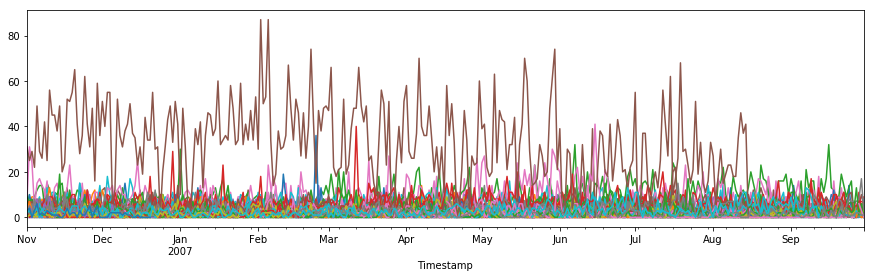

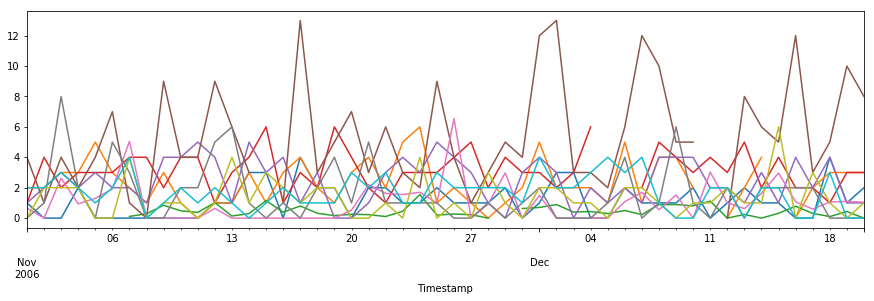

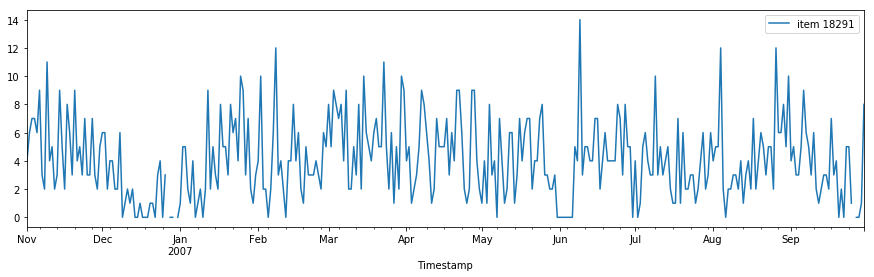

In [6]:
ts['TS_dep6'].plot(figsize=(15,4), legend=False)
ts['TS_dep6'].iloc[:50,10:20].plot(figsize=(15,4), legend=False)
ts['TS_dep6'].iloc[:,9:10].plot(figsize=(15,4))

In [7]:
ts['TS_dep36'] = pd.read_csv('./data/TS_dep36.csv', sep=';',  decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
print(ts['TS_dep36'].shape)
ts['TS_dep36'].iloc[:10]

(398, 105)


,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0,0,"2,484",0,0.0,"1,334",1,1,2.0,0,...,7,12,0,"66,324","32,864",12,23,63,14,177
2005-05-13,"0,878","0,983","2,632","1,12",1.0,"3,514",4,0,1.0,0,...,16,17,0,"69,952","34,024",24,30,97,13,63
2005-05-14,"0,332","1,346","2,016","0,302",1.0,"2,59",0,2,0.0,1,...,11,12,0,"35,366","31,626",20,0,80,12,94
2005-05-15,0,"0,556","0,882",0,4.0,"1,708",1,1,1.0,2,...,9,15,0,"37,898","43,726",20,0,64,6,105
2005-05-16,"0,438","0,671","0,314","1,486",2.0,"2,79",3,0,2.0,1,...,11,11,0,"49,566","34,548",23,0,43,4,51
2005-05-17,0,0,"0,69","0,472",1.0,"0,282",1,1,0.0,1,...,6,12,0,"43,498","22,344",19,30,75,5,81
2005-05-18,"0,73",0,"0,912","0,386",1.0,"5,438",5,3,0.0,1,...,5,14,0,"46,41","22,816",19,22,44,36,91
2005-05-19,"0,338","0,319","1,268","0,228",3.0,"3,272",2,2,3.0,1,...,6,21,0,"32,976","33,542",20,20,61,12,110
2005-05-20,"0,338","0,504","2,268","1,102",2.0,"6,36",3,1,1.0,4,...,11,14,0,"68,566","46,424",15,21,59,10,150


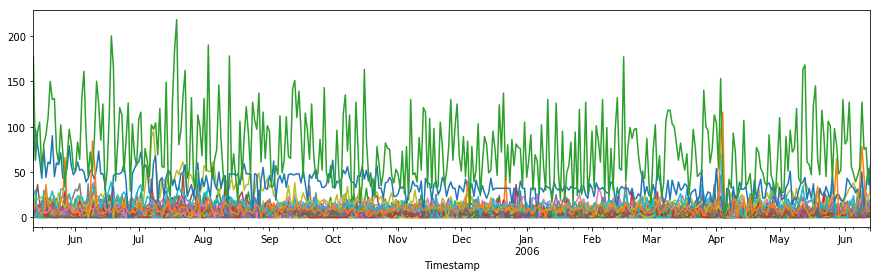

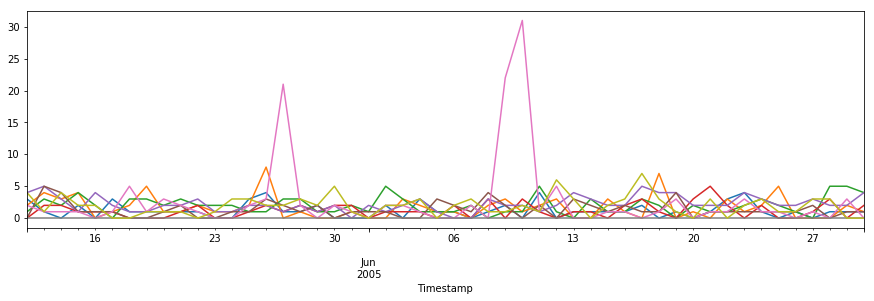

In [8]:
ts['TS_dep36'].plot(figsize=(15,4), legend=False)
ts['TS_dep36'].iloc[:50,10:20].plot(figsize=(15,4), legend=False)

In [9]:
ts['TS_dep42'] = pd.read_csv('./data/TS_dep42.csv', sep=';',  decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
print(ts['TS_dep42'].shape)
ts['TS_dep42'].iloc[20:30]

(1135, 155)


,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-23,0.772284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-24,0.951834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-25,0.256273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-26,-0.674905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-27,-0.985578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-28,-0.390115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-29,0.564018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-30,0.999595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-31,0.516150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


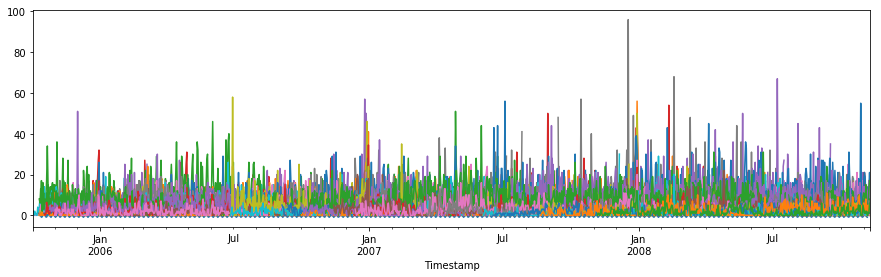

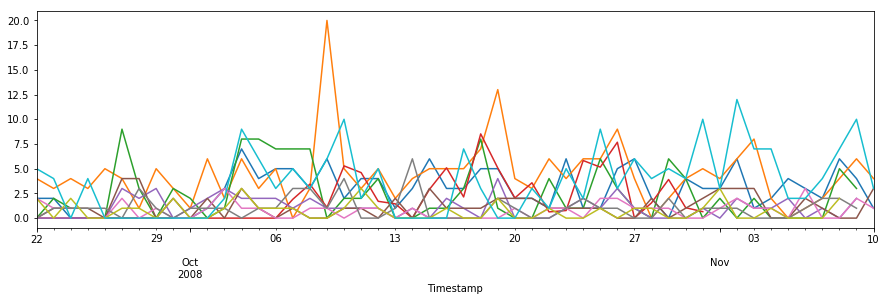

In [10]:
ts['TS_dep42'].plot(figsize=(15,4), legend=False)
ts['TS_dep42'].iloc[-50:,10:20].plot(figsize=(15,4), legend=False)


<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [11]:
ts = pd.read_csv('./data/monthly_wage.csv', sep=';',  decimal='.', index_col='Month', parse_dates=True, dayfirst=False)

In [12]:
ts_train = ts.loc['1998-09':]

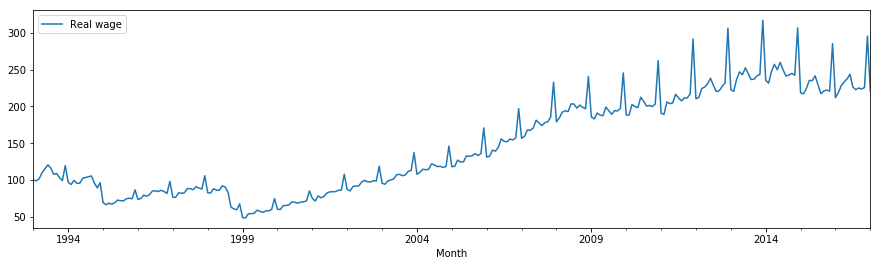

In [13]:
ts.plot(figsize=(15,4))

In [14]:
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [15]:
SES = pd.DataFrame(index=ts_train.index)
SES['Real wage'] = ts['Real wage']

In [16]:
ALPHA = [ 0.05, 0.1, 0.15, 0.2, 0.4, 0.7, 0.90, 0.95, 1] 
h = 1
for alpha in ALPHA:
    for cntr in ts_train.columns:
        forecast = SimpleExponentialSmoothing(ts_train[cntr], h, {'alpha':alpha})
        SES['forecast %s alpha=%0.2f' % (cntr,alpha)] = forecast[:len(SES.index)]


In [17]:
QualityStr = pd.DataFrame(index = [float(x[-4:]) for x in SES.columns[1:]], columns = ['MedianAE','MSE'])
for s_alpha in SES.columns[1:]:
    frc_ts = SES[s_alpha]
    QualityStr.loc[float(s_alpha[-4:])] = [qualityMedianAE(SES['Real wage'][:'2015-01-01'], frc_ts[:'2015-01-01'])[0], 
                                qualityMSE(SES['Real wage'][:'2015-01-01'], frc_ts[:'2015-01-01'])[0]]

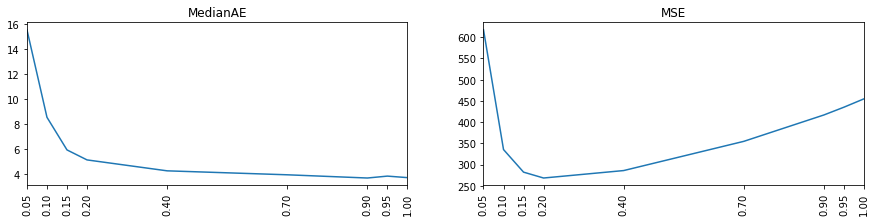

In [18]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
QualityStr['MedianAE'].plot(rot=90, xticks=QualityStr.index)
plt.title('MedianAE')
plt.subplot(1,2,2)
QualityStr['MSE'].plot(rot=90, xticks=QualityStr.index)
plt.title('MSE')

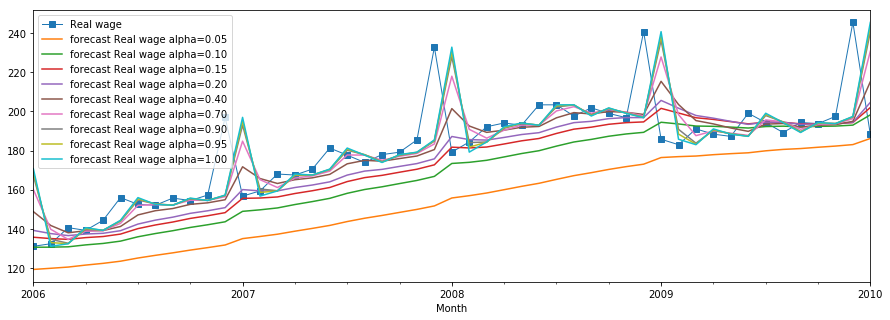

In [19]:
SES[SES.columns[0]].loc['2006-01':'2010-01'].plot(figsize=(15,5), linewidth=1, marker='s')
for c in SES.columns[1:]:
    SES[c].loc['2006-01':'2010-01'].plot(figsize=(15,5))
plt.legend()

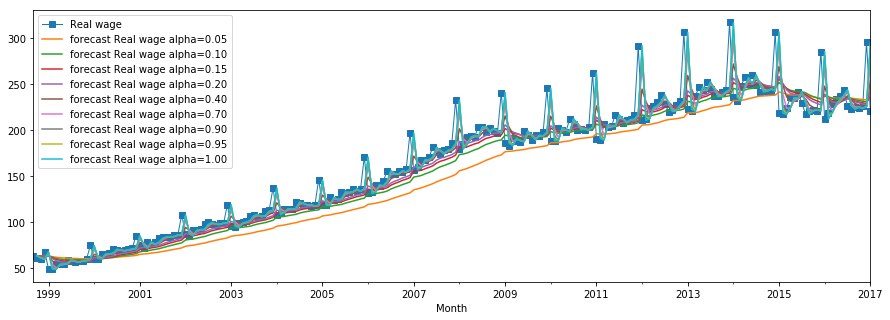

In [20]:
SES[SES.columns[0]].loc[:].plot(figsize=(15,5), linewidth=1, marker='s')
for c in SES.columns[1:]:
    SES[c].loc[:].plot(figsize=(15,5))
plt.legend()

### accuracy

In [21]:
    print('RMSE')
    print('alpha 1.0: %0.2f' % qualityRMSE(SES['Real wage'].loc['2015-01-01':], SES['forecast Real wage alpha=1.00'].loc['2015-01-01':])[0])
    print('alpha 0.2: %0.2f' % qualityRMSE(SES['Real wage'].loc['2015-01-01':], SES['forecast Real wage alpha=0.20'].loc['2015-01-01':])[0])
    print('MedianAE')
    print('alpha 1.0: %0.2f' % qualityMedianAE(SES['Real wage'].loc['2015-01-01':], SES['forecast Real wage alpha=1.00'].loc['2015-01-01':])[0])
    print('alpha 0.2: %0.2f' % qualityMedianAE(SES['Real wage'].loc['2015-01-01':], SES['forecast Real wage alpha=0.20'].loc['2015-01-01':])[0])

RMSE
alpha 1.0: 33.95
alpha 0.2: 23.33
MedianAE
alpha 1.0: 6.60
alpha 0.2: 9.32


In [22]:
ts_year = ts.groupby(ts.index.year).mean()
ts_year.index = pd.to_datetime(ts_year.index, format='%Y')
SES_year = pd.DataFrame(index=ts_year.loc['1998':].index)
SES_year['Real wage'] = ts_year.loc['1998':]

In [23]:
ALPHA = [ 0.05, 0.1, 0.15, 0.2, 0.4, 0.7, 0.90, 0.95, 1] 
h = 1
for alpha in ALPHA:
    for cntr in SES_year.columns[0:1]:
        forecast = SimpleExponentialSmoothing(SES_year[cntr], h, {'alpha':alpha})
        SES_year['forecast %s alpha=%0.2f' % (cntr,alpha)] = forecast[:len(SES_year.index)]
        
QualityStr = pd.DataFrame(index = [float(x[-4:]) for x in SES_year.columns[1:]], columns = ['MedianAE','MSE'])
for s_alpha in SES_year.columns[1:]:
    frc_ts = SES_year[s_alpha]
    QualityStr.loc[float(s_alpha[-4:])] = [qualityMedianAE(SES_year['Real wage'][:'2015'], frc_ts[:'2015'])[0], 
                                qualityMSE(SES_year['Real wage'][:'2015'], frc_ts[:'2015'])[0]]

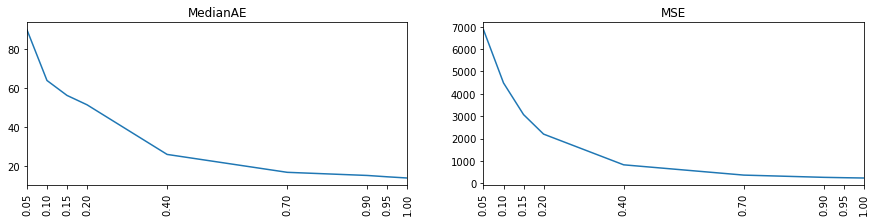

In [24]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
QualityStr['MedianAE'].plot(rot=90, xticks=QualityStr.index)
plt.title('MedianAE')
plt.subplot(1,2,2)
QualityStr['MSE'].plot(rot=90, xticks=QualityStr.index)
plt.title('MSE')

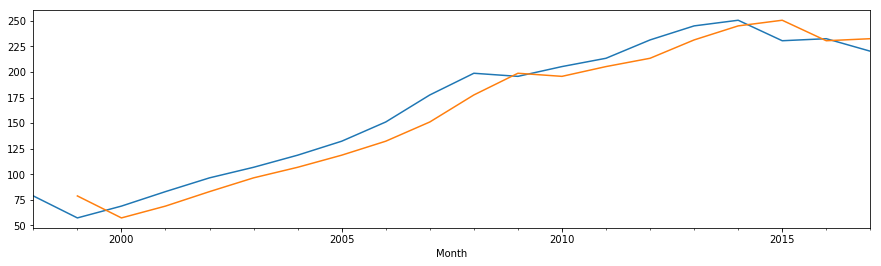

In [25]:
plt.figure(figsize=(15,4))
SES_year['Real wage'].plot()
SES_year['forecast Real wage alpha=1.00'].plot()

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [26]:
# Start with this code


###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    x = np.array(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.nan]*(T + h)
    np.array
    l= np.nan# initialize ts level 
    s= [c - np.mean(x[:p]) for c in x[:p]]# initalize seasonality values (it must be vector of lenth p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] - l 
 
            l = alpha * (x[cntr] - s[cntr % p]) + (1-alpha)*l
            
            s[cntr % p] = delta * (x[cntr] - l) + (1-delta) * s[cntr % p]
            
        FORECAST[cntr+1] = l + s[(cntr+h) % p]
    
    return FORECAST

In [27]:
winters_model = pd.DataFrame(index=ts.loc['1998-01-01':].index)

winters_model['Real wage'] = ts.loc['1998-01-01':]

ALPHA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
DELTA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
QualityStr = np.zeros((2,len(ALPHA),len(DELTA)))
print(QualityStr.shape)
for i_delta, delta in enumerate(DELTA):
    for i_alpha, alpha in enumerate(ALPHA):
        forecast = WintersExponentialSmoothing(winters_model['Real wage'], 1,
                                               {'alpha':alpha, 'delta': delta, 'seasonality_period':12})
       
        winters_model['delta=%0.2f alpha=%0.2f' % (delta, alpha)] = forecast[:winters_model.index.size]
        frc_ts =winters_model['delta=%0.2f alpha=%0.2f' % (delta, alpha)]
        print(0, i_alpha, i_delta)
        QualityStr[0, i_alpha, i_delta] = float(qualityMedianAE(winters_model['Real wage'][:'2015'], frc_ts[:'2015'])[0])
        QualityStr[1, i_alpha, i_delta] = float(qualityRMSE(winters_model['Real wage'][:'2015'], frc_ts[:'2015'])[0])


(2, 11, 11)
(0, 0, 0)
(0, 1, 0)
(0, 2, 0)
(0, 3, 0)
(0, 4, 0)
(0, 5, 0)
(0, 6, 0)
(0, 7, 0)
(0, 8, 0)
(0, 9, 0)
(0, 10, 0)
(0, 0, 1)
(0, 1, 1)
(0, 2, 1)
(0, 3, 1)
(0, 4, 1)
(0, 5, 1)
(0, 6, 1)
(0, 7, 1)
(0, 8, 1)
(0, 9, 1)
(0, 10, 1)
(0, 0, 2)
(0, 1, 2)
(0, 2, 2)
(0, 3, 2)
(0, 4, 2)
(0, 5, 2)
(0, 6, 2)
(0, 7, 2)
(0, 8, 2)
(0, 9, 2)
(0, 10, 2)
(0, 0, 3)
(0, 1, 3)
(0, 2, 3)
(0, 3, 3)
(0, 4, 3)
(0, 5, 3)
(0, 6, 3)
(0, 7, 3)
(0, 8, 3)
(0, 9, 3)
(0, 10, 3)
(0, 0, 4)
(0, 1, 4)
(0, 2, 4)
(0, 3, 4)
(0, 4, 4)
(0, 5, 4)
(0, 6, 4)
(0, 7, 4)
(0, 8, 4)
(0, 9, 4)
(0, 10, 4)
(0, 0, 5)
(0, 1, 5)
(0, 2, 5)
(0, 3, 5)
(0, 4, 5)
(0, 5, 5)
(0, 6, 5)
(0, 7, 5)
(0, 8, 5)
(0, 9, 5)
(0, 10, 5)
(0, 0, 6)
(0, 1, 6)
(0, 2, 6)
(0, 3, 6)
(0, 4, 6)
(0, 5, 6)
(0, 6, 6)
(0, 7, 6)
(0, 8, 6)
(0, 9, 6)
(0, 10, 6)
(0, 0, 7)
(0, 1, 7)
(0, 2, 7)
(0, 3, 7)
(0, 4, 7)
(0, 5, 7)
(0, 6, 7)
(0, 7, 7)
(0, 8, 7)
(0, 9, 7)
(0, 10, 7)
(0, 0, 8)
(0, 1, 8)
(0, 2, 8)
(0, 3, 8)
(0, 4, 8)
(0, 5, 8)
(0, 6, 8)
(0, 7, 8)
(0, 8, 8)
(0, 9, 8)


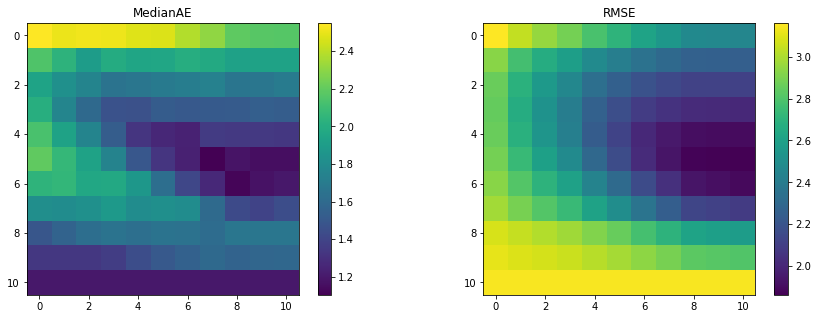

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,title='MedianAE')
plt.imshow(np.log(QualityStr[0]),interpolation='none',)
plt.colorbar()

plt.subplot(1,2,2,title='RMSE')
plt.imshow(np.log(QualityStr[1]),interpolation='none', )
plt.colorbar()

In [29]:
('alpha:delta',np.unravel_index(QualityStr[0].argmin(), QualityStr[0].shape),
 np.unravel_index(QualityStr[1].argmin(), QualityStr[1].shape))

('alpha:delta', (5, 7), (5, 10))

delta=0.40 alpha=0.40


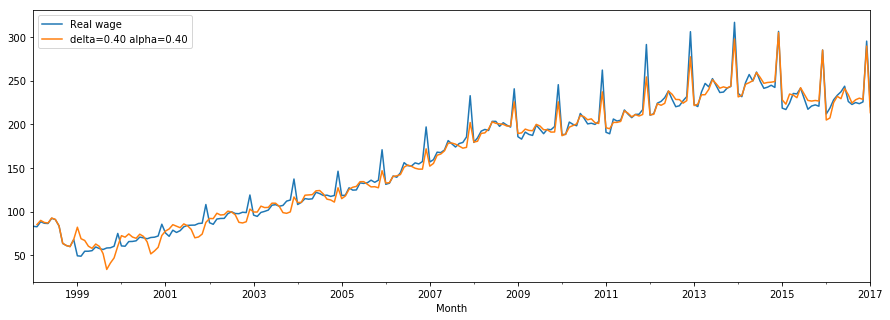

In [30]:
winters_model['Real wage'].plot(figsize=(15,5))
print('delta=%0.2f alpha=%0.2f' % (ALPHA[5], DELTA[5]))
winters_model['delta=%0.2f alpha=%0.2f' % (ALPHA[5], DELTA[5])].plot(figsize=(15,5))

plt.legend()

In [32]:
print('RMSE')
print('delta=0.40 alpha=0.40: %0.2f' % qualityRMSE(winters_model['Real wage'].loc['2015-01-01':], winters_model['delta=0.40 alpha=0.40'].loc['2015-01-01':])[0])
print('delta=0.40 alpha=0.70: %0.2f' % qualityRMSE(winters_model['Real wage'].loc['2015-01-01':], winters_model['delta=0.40 alpha=0.70'].loc['2015-01-01':])[0])
print('MedianAE')
print('delta=0.40 alpha=0.40: %0.2f' % qualityMedianAE(winters_model['Real wage'].loc['2015-01-01':], winters_model['delta=0.40 alpha=0.40'].loc['2015-01-01':])[0])
print('delta=0.40 alpha=0.70: %0.2f' % qualityMedianAE(winters_model['Real wage'].loc['2015-01-01':], winters_model['delta=0.40 alpha=0.70'].loc['2015-01-01':])[0])

RMSE
delta=0.40 alpha=0.40: 6.13
delta=0.40 alpha=0.70: 10.38
MedianAE
delta=0.40 alpha=0.40: 5.69
delta=0.40 alpha=0.70: 5.18


<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [33]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    delta = Params['delta']
    AdaptationPeriod=Params['AdaptationPeriod']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)
    
    l = np.NaN
    b = np.nan
    s= [c - np.mean(x[:p]) for c in x[:p]]
    
    t0= np.NaN
    
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l=x[t]
                b = 0
                t0=t
                e1=alpha
                e2 = 1
            elif (t-t0)>h:
                e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            if math.isnan(s[t % p]):
                s[t % p]= x[t] - l 
            
            K = alpha if e2==0 else np.abs(e1/e2)
            alpha = Kt_1
            Kt_1 = K
            use_this_alpha = alpha 
            if t-t0<AdaptationPeriod:
                use_this_alpha = alpha*(1 - (t-t0+1)/(AdaptationPeriod))  
                
            l_new = use_this_alpha * (x[t] - s[t % p]) + (1-use_this_alpha) * (l + b)
            b = beta * (l_new - l) + (1-beta) * b
            s[t % p] = delta * (x[t] - l_new) + (1-delta) * s[t % p]
            l = l_new
        FORECAST[t+h] = (l + h*b) + s[(t+h) % p]
    return FORECAST

In [34]:
theil_wage = pd.DataFrame(index=ts.loc['1998-01-01':].index)

theil_wage['Real wage'] = ts.loc['1998-01-01':]

ALPHA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
BETA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
DELTA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )

QualityStr = np.zeros((2,len(ALPHA),len(BETA),len(DELTA)))
print(QualityStr.shape)
for i_alpha, alpha in enumerate(ALPHA[:]):
    for i_beta, beta in enumerate(BETA[:]):
        for i_delta, delta in enumerate(DELTA[:]):
            forecast = AdaptiveExponentialSmoothing(theil_wage['Real wage'], 1,
                                                   {'alpha':alpha,'beta':beta, 'delta': delta,'gamma':0.05,
                                                    'seasonality_period':12,
                                                    'AdaptationPeriod':10})

            theil_wage['alpha=%0.2f beta=%0.2f delta=%0.2f' % (alpha, beta, delta)] = forecast[:theil_wage.index.size]
            frc_ts =theil_wage['alpha=%0.2f beta=%0.2f delta=%0.2f' % (alpha, beta, delta)]
            print(i_alpha,i_beta, i_delta)
            QualityStr[0, i_alpha, i_beta, i_delta] = float(qualityMedianAE(theil_wage['Real wage'][:'2015'], frc_ts[:'2015'])[0])
            QualityStr[1, i_alpha, i_beta, i_delta] = float(qualityRMSE(theil_wage['Real wage'][:'2015'], frc_ts[:'2015'])[0])


(2, 11, 11, 11)
(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 6)
(0, 0, 7)
(0, 0, 8)
(0, 0, 9)
(0, 0, 10)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 5, 0)
(0, 5, 1)
(0, 5, 2)
(0, 5, 3)
(0, 5, 4)
(0, 5, 5)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 5, 10)
(0, 6, 0)
(0, 6, 1)
(0, 6, 2)
(0, 6, 3)
(0, 6, 4)
(0, 6, 5)
(0, 6, 6)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 6, 10)
(0, 7, 0)
(0, 7, 1)
(0, 7, 2)
(0, 7, 3)
(0, 7, 4)
(0, 7, 5)
(0, 7, 6)
(0, 7, 7)
(0, 7, 8)
(0, 7, 9)
(0, 7, 10)
(0, 8, 0)
(0, 8, 1)
(0, 8, 2)
(0, 8, 3)
(0, 8, 4)
(0, 8, 5)
(0, 8, 6)
(0, 8, 7)
(0, 8, 8)
(0, 8,

(6, 7, 1)
(6, 7, 2)
(6, 7, 3)
(6, 7, 4)
(6, 7, 5)
(6, 7, 6)
(6, 7, 7)
(6, 7, 8)
(6, 7, 9)
(6, 7, 10)
(6, 8, 0)
(6, 8, 1)
(6, 8, 2)
(6, 8, 3)
(6, 8, 4)
(6, 8, 5)
(6, 8, 6)
(6, 8, 7)
(6, 8, 8)
(6, 8, 9)
(6, 8, 10)
(6, 9, 0)
(6, 9, 1)
(6, 9, 2)
(6, 9, 3)
(6, 9, 4)
(6, 9, 5)
(6, 9, 6)
(6, 9, 7)
(6, 9, 8)
(6, 9, 9)
(6, 9, 10)
(6, 10, 0)
(6, 10, 1)
(6, 10, 2)
(6, 10, 3)
(6, 10, 4)
(6, 10, 5)
(6, 10, 6)
(6, 10, 7)
(6, 10, 8)
(6, 10, 9)
(6, 10, 10)
(7, 0, 0)
(7, 0, 1)
(7, 0, 2)
(7, 0, 3)
(7, 0, 4)
(7, 0, 5)
(7, 0, 6)
(7, 0, 7)
(7, 0, 8)
(7, 0, 9)
(7, 0, 10)
(7, 1, 0)
(7, 1, 1)
(7, 1, 2)
(7, 1, 3)
(7, 1, 4)
(7, 1, 5)
(7, 1, 6)
(7, 1, 7)
(7, 1, 8)
(7, 1, 9)
(7, 1, 10)
(7, 2, 0)
(7, 2, 1)
(7, 2, 2)
(7, 2, 3)
(7, 2, 4)
(7, 2, 5)
(7, 2, 6)
(7, 2, 7)
(7, 2, 8)
(7, 2, 9)
(7, 2, 10)
(7, 3, 0)
(7, 3, 1)
(7, 3, 2)
(7, 3, 3)
(7, 3, 4)
(7, 3, 5)
(7, 3, 6)
(7, 3, 7)
(7, 3, 8)
(7, 3, 9)
(7, 3, 10)
(7, 4, 0)
(7, 4, 1)
(7, 4, 2)
(7, 4, 3)
(7, 4, 4)
(7, 4, 5)
(7, 4, 6)
(7, 4, 7)
(7, 4, 8)
(7, 4, 9)
(7, 4, 10)


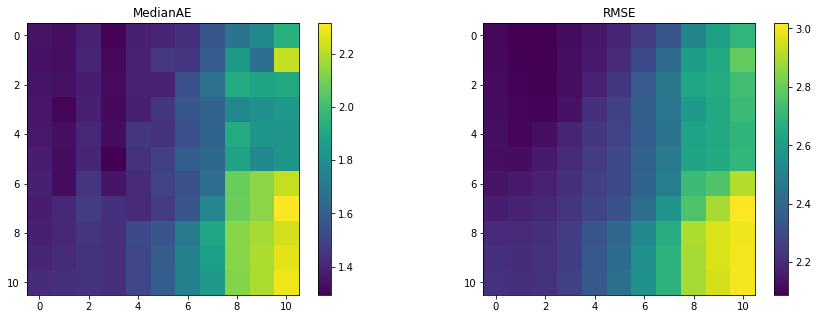

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,title='MedianAE')
plt.imshow(np.log(QualityStr[0,:,:,5]),interpolation='none',)
plt.colorbar()
plt.subplot(1,2,2,title='RMSE')
plt.imshow(np.log(QualityStr[1,:,:,5]),interpolation='none', )
plt.colorbar()

In [37]:
np.dstack(np.unravel_index(np.argsort(QualityStr[0].ravel()), QualityStr[0].shape))[0][:80:5].T

array([[ 3,  1,  2,  2,  3,  1,  3,  1,  7,  3,  0,  6,  5,  9,  1,  3],
       [ 1,  1,  0,  2,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  2,  2],
       [ 8,  8,  9,  7,  9, 10,  8,  7,  7,  7,  7,  8,  7,  7,  6,  6]])

RMSE
alpha=0.20 beta=0.10 delta=0.70: 5.55
MedianAE
alpha=0.20 beta=0.10 delta=0.70: 4.11


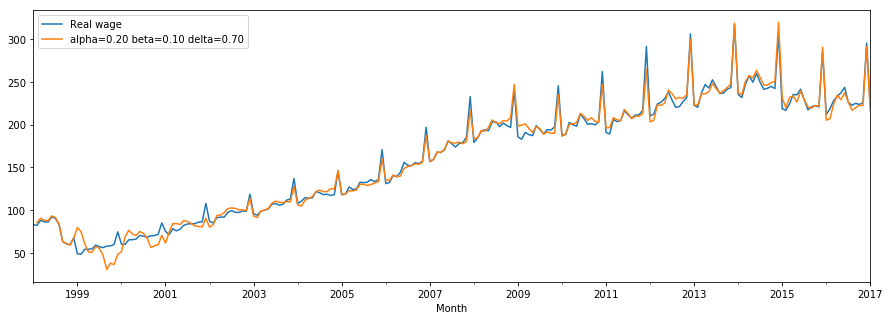

In [38]:
theil_wage['Real wage'].plot(figsize=(15,5))
# print('delta=%0.2f alpha=%0.2f' % (ALPHA[5], DELTA[5]))
i_alpha, i_beta, i_delta = (3,1,7)
s = 'alpha=%0.2f beta=%0.2f delta=%0.2f' % (ALPHA[i_alpha], BETA[i_beta], DELTA[i_delta])

theil_wage[s].plot(figsize=(15,5))

plt.legend()

print('RMSE')
print(s + ': %0.2f' % qualityRMSE(theil_wage['Real wage'].loc['2015-01-01':], theil_wage[s].loc['2015-01-01':])[0])
print('MedianAE')
print(s + ': %0.2f' % qualityMedianAE(theil_wage['Real wage'].loc['2015-01-01':], theil_wage[s].loc['2015-01-01':])[0])

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

In [39]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def MultiplicativeExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    delta = Params['delta']
    AdaptationPeriod=Params['AdaptationPeriod']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)
    
    l = np.NaN
    b = np.nan
    s= [c - np.mean(x[:p] + 1e-3) for c in x[:p]]
    
    t0= np.NaN
    
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l=x[t]
                b = 0
                t0=t
                e1=alpha
                e2 = 1
            elif (t-t0)>h:
                e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            if math.isnan(s[t % p]):
                s[t % p]= x[t] - l 
            
            K = alpha if e2==0 else np.abs(e1/e2)
            alpha = Kt_1
            Kt_1 = K
            use_this_alpha = alpha 
            if t-t0<AdaptationPeriod:
                use_this_alpha = alpha*(1 - (t-t0+1)/(AdaptationPeriod))  
                
            l_new = use_this_alpha * (x[t] / s[t % p]) + (1-use_this_alpha) * (l + b)
            b = beta * (l_new - l) + (1-beta) * b
            s[t % p] = delta * (x[t] / l_new) + (1-delta) * s[t % p]
            l = l_new
        FORECAST[t+h] = (l + h*b) * s[(t+h) % p]
    return FORECAST

In [40]:
multiplicative = pd.DataFrame(index=ts.loc['1998-01-01':].index)

multiplicative['Real wage'] = ts.loc['1998-01-01':]

ALPHA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
BETA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )
DELTA = sorted([ 0.05, 0.1, 0.15,0.30, 0.2, 0.4,0.55, 0.7, 0.90, 0.95, 1] )

QualityStr = np.zeros((2,len(ALPHA),len(BETA),len(DELTA)))
print(QualityStr.shape)
for i_alpha, alpha in enumerate(ALPHA):
    for i_beta, beta in enumerate(BETA):
        for i_delta, delta in enumerate(DELTA):
            forecast = AdaptiveExponentialSmoothing(multiplicative['Real wage'], 1,
                                                   {'alpha':alpha,'beta':beta, 'delta': delta,'gamma':0.05,
                                                    'seasonality_period':12,
                                                    'AdaptationPeriod':10})

            multiplicative['alpha=%0.2f beta=%0.2f delta=%0.2f' % (alpha, beta, delta)] = forecast[:multiplicative.index.size]
            frc_ts =theil_wage['alpha=%0.2f beta=%0.2f delta=%0.2f' % (alpha, beta, delta)]
            print(i_alpha,i_beta, i_delta)
            QualityStr[0, i_alpha, i_beta, i_delta] = float(qualityMedianAE(multiplicative['Real wage'][:'2015'], frc_ts[:'2015'])[0])
            QualityStr[1, i_alpha, i_beta, i_delta] = float(qualityRMSE(multiplicative['Real wage'][:'2015'], frc_ts[:'2015'])[0])


(2, 11, 11, 11)
(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 6)
(0, 0, 7)
(0, 0, 8)
(0, 0, 9)
(0, 0, 10)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 5, 0)
(0, 5, 1)
(0, 5, 2)
(0, 5, 3)
(0, 5, 4)
(0, 5, 5)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 5, 10)
(0, 6, 0)
(0, 6, 1)
(0, 6, 2)
(0, 6, 3)
(0, 6, 4)
(0, 6, 5)
(0, 6, 6)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 6, 10)
(0, 7, 0)
(0, 7, 1)
(0, 7, 2)
(0, 7, 3)
(0, 7, 4)
(0, 7, 5)
(0, 7, 6)
(0, 7, 7)
(0, 7, 8)
(0, 7, 9)
(0, 7, 10)
(0, 8, 0)
(0, 8, 1)
(0, 8, 2)
(0, 8, 3)
(0, 8, 4)
(0, 8, 5)
(0, 8, 6)
(0, 8, 7)
(0, 8, 8)
(0, 8,

(6, 7, 4)
(6, 7, 5)
(6, 7, 6)
(6, 7, 7)
(6, 7, 8)
(6, 7, 9)
(6, 7, 10)
(6, 8, 0)
(6, 8, 1)
(6, 8, 2)
(6, 8, 3)
(6, 8, 4)
(6, 8, 5)
(6, 8, 6)
(6, 8, 7)
(6, 8, 8)
(6, 8, 9)
(6, 8, 10)
(6, 9, 0)
(6, 9, 1)
(6, 9, 2)
(6, 9, 3)
(6, 9, 4)
(6, 9, 5)
(6, 9, 6)
(6, 9, 7)
(6, 9, 8)
(6, 9, 9)
(6, 9, 10)
(6, 10, 0)
(6, 10, 1)
(6, 10, 2)
(6, 10, 3)
(6, 10, 4)
(6, 10, 5)
(6, 10, 6)
(6, 10, 7)
(6, 10, 8)
(6, 10, 9)
(6, 10, 10)
(7, 0, 0)
(7, 0, 1)
(7, 0, 2)
(7, 0, 3)
(7, 0, 4)
(7, 0, 5)
(7, 0, 6)
(7, 0, 7)
(7, 0, 8)
(7, 0, 9)
(7, 0, 10)
(7, 1, 0)
(7, 1, 1)
(7, 1, 2)
(7, 1, 3)
(7, 1, 4)
(7, 1, 5)
(7, 1, 6)
(7, 1, 7)
(7, 1, 8)
(7, 1, 9)
(7, 1, 10)
(7, 2, 0)
(7, 2, 1)
(7, 2, 2)
(7, 2, 3)
(7, 2, 4)
(7, 2, 5)
(7, 2, 6)
(7, 2, 7)
(7, 2, 8)
(7, 2, 9)
(7, 2, 10)
(7, 3, 0)
(7, 3, 1)
(7, 3, 2)
(7, 3, 3)
(7, 3, 4)
(7, 3, 5)
(7, 3, 6)
(7, 3, 7)
(7, 3, 8)
(7, 3, 9)
(7, 3, 10)
(7, 4, 0)
(7, 4, 1)
(7, 4, 2)
(7, 4, 3)
(7, 4, 4)
(7, 4, 5)
(7, 4, 6)
(7, 4, 7)
(7, 4, 8)
(7, 4, 9)
(7, 4, 10)
(7, 5, 0)
(7, 5, 1)
(7, 5, 2)


In [41]:
np.dstack(np.unravel_index(np.argsort(QualityStr[0].ravel()), QualityStr[0].shape))[0][:80:5].T

array([[ 3,  1,  2,  2,  3,  1,  3,  1,  7,  3,  0,  6,  5,  9,  1,  3],
       [ 1,  1,  0,  2,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  2,  2],
       [ 8,  8,  9,  7,  9, 10,  8,  7,  7,  7,  7,  8,  7,  7,  6,  6]])

RMSE
alpha=0.30 beta=0.10 delta=0.55: 5.56
MedianAE
alpha=0.30 beta=0.10 delta=0.55: 4.21


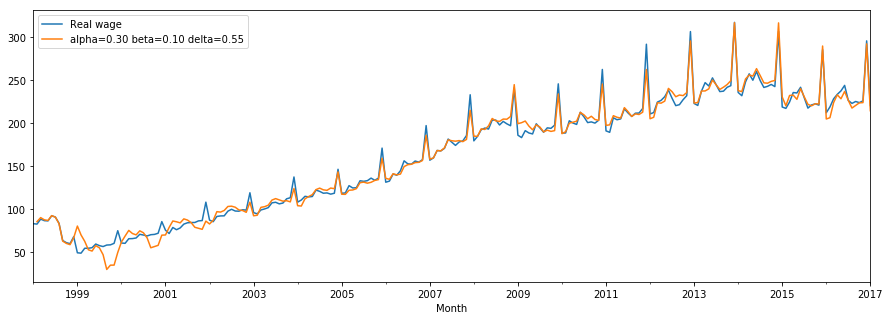

In [42]:
theil_wage['Real wage'].plot(figsize=(15,5))
# print('delta=%0.2f alpha=%0.2f' % (ALPHA[5], DELTA[5]))
i_alpha, i_beta, i_delta = (4,1,6)
s = 'alpha=%0.2f beta=%0.2f delta=%0.2f' % (ALPHA[i_alpha], BETA[i_beta], DELTA[i_delta])

theil_wage[s].plot(figsize=(15,5))

plt.legend()

print('RMSE')
print(s + ': %0.2f' % qualityRMSE(theil_wage['Real wage'].loc['2015-01-01':], theil_wage[s].loc['2015-01-01':])[0])
print('MedianAE')
print(s + ': %0.2f' % qualityMedianAE(theil_wage['Real wage'].loc['2015-01-01':], theil_wage[s].loc['2015-01-01':])[0])

### Together

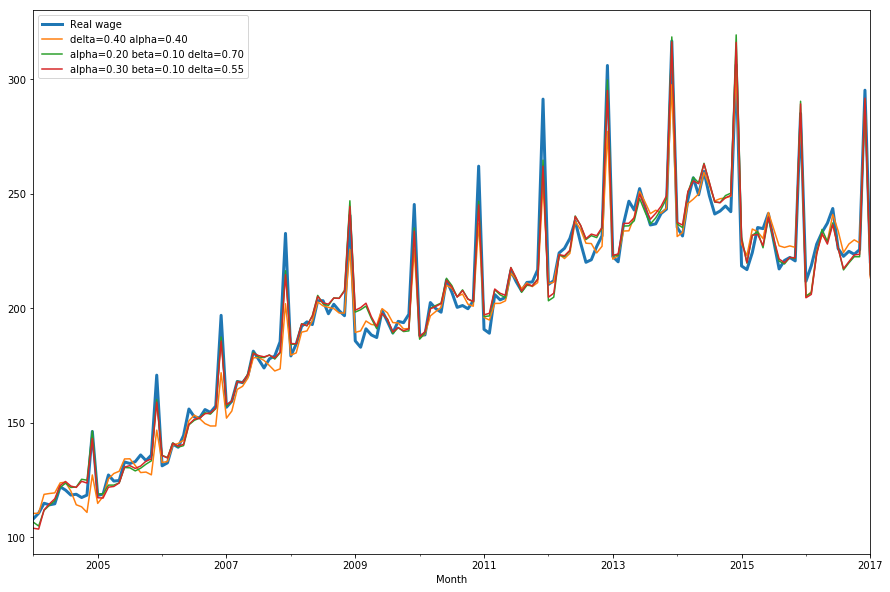

In [43]:
plt.figure(figsize=(15,10))
ts['Real wage']['2004':].plot(linewidth=3)
winters_model['delta=0.40 alpha=0.40']['2004':].plot()
theil_wage['alpha=0.20 beta=0.10 delta=0.70']['2004':].plot()
multiplicative['alpha=0.30 beta=0.10 delta=0.55']['2004':].plot()
plt.legend()

### Conclusion
From the results, loss on multiplicative model is less then additive model. From these forecasts I can't do any asumptions, becaus they are too similar. But the model with treng is definitely better then SES